In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import random 
from wordcloud import WordCloud

### Preprocessing

#### Exploring Data

In [2]:
data = pd.read_csv('dataset.csv ',encoding='latin1')

In [3]:
data.head()

,ï»¿Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
data.shape

(9551, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ï»¿Restaurant ID      9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
data.describe()

,ï»¿Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


### Removing duplicates

In [7]:
data.drop_duplicates(["ï»¿Restaurant ID"], keep='first',inplace=True)
data.shape

(9551, 21)

In [8]:
data.isnull().sum()

ï»¿Restaurant ID        0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
data["City"].unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Brasï¿½_lia', 'Rio de Janeiro', 'Sï¿½ï¿½o Paulo',
       'Albany', 'Armidale', 'Athens', 'Augusta', 'Balingup',
       'Beechworth', 'Boise', 'Cedar Rapids/Iowa City', 'Chatham-Kent',
       'Clatskanie', 'Cochrane', 'Columbus', 'Consort', 'Dalton',
       'Davenport', 'Des Moines', 'Dicky Beach', 'Dubuque',
       'East Ballina', 'Fernley', 'Flaxton', 'Forrest', 'Gainesville',
       'Hepburn Springs', 'Huskisson', 'Inverloch', 'Lakes Entrance',
       'Lakeview', 'Lincoln', 'Lorn', 'Macedon', 'Macon', 'Mayfield',
       'Mc Millan', 'Middleton Beach', 'Miller', 'Monroe', 'Montville',
       'Ojo Caliente', 'Orlando', 'Palm Cove', 'Paynesville', 'Penola',
       'Pensacola', 'Phillip Island', 'Pocatello', 'Potrero', 'Princeton',
       'Rest of Hawaii', 'Savannah', 'Singapore', 'Sioux City',
       'Tampa Bay', 'Tanunda', 'T

In [10]:
print(data["City"].unique()[0])
print(type(data["City"].unique()[0]))

Makati City
<class 'str'>


In [11]:
#removing[''] from each value
print(data["City"].unique()[0])
data["City"]= data["City"].apply(lambda x:x[2:-2])
print(data["City"].unique()[0])

#Changing'' to 'NA'
print(data["City"].unique())
data["City"]= data["City"].apply(lambda x: np.where(x=="","NA", x))
print(data["City"].unique())


Makati City
kati Ci
['kati Ci' 'ndaluyong Ci' 'say Ci' 'sig Ci' 'ezon Ci' 'n Juan Ci' 'nta Ro'
 'gaytay Ci' 'guig Ci' 'asï¿½_l' 'o de Janei' '¿½ï¿½o Pau' 'ba' 'mida'
 'he' 'gus' 'ling' 'echwor' 'i' 'dar Rapids/Iowa Ci' 'atham-Ke' 'atskan'
 'chra' 'lumb' 'nso' 'lt' 'venpo' 's Moin' 'cky Bea' 'buq' 'st Balli'
 'rnl' 'axt' 'rre' 'inesvil' 'pburn Sprin' 'skiss' 'verlo' 'kes Entran'
 'kevi' 'nco' '' 'ced' 'c' 'yfie' ' Mill' 'ddleton Bea' 'll' 'nr' 'ntvil'
 'o Calien' 'lan' 'lm Co' 'ynesvil' 'no' 'nsaco' 'illip Isla' 'catel'
 'tre' 'incet' 'st of Hawa' 'vann' 'ngapo' 'oux Ci' 'mpa B' 'nun'
 'entham Ea' 'ldos' 'rnon' 'ctor Harb' 'neland Stati' 'terl' 'irt'
 'nchester B' 'rkt' 'u Dha' 'b' 'arj' 'medab' 'lahab' 'rits' 'rangab'
 'ngalo' 'op' 'ubaneshw' 'andiga' 'enn' 'imbato' 'hrad' 'ridab' 'aziab'
 'rga' 'waha' 'derab' 'do' 'ip' 'np' 'lka' 'ckn' 'dhia' 'ha' 'mb' 'so'
 'gp' 'sh' 'w Del' 'nchku' 't' 'ducher' 'nc' 'cunderab' 'r' 'doda' 'rana'
 'z' 'ndu' 'g' 'kar' 'ngera' 'ckla' 'llington Ci' 'rmin

In [12]:
data["Locality"].nunique()

1208

In [13]:
data["Country Code"].unique()

array([162,  30, 216,  14,  37, 184, 214,   1,  94, 148, 215, 166, 189,
       191, 208], dtype=int64)

In [14]:
data["Locality Verbose"].nunique()

1265

In [15]:
print(data["Cuisines"].nunique())
print(data["Cuisines"].unique())

1825
['French, Japanese, Desserts' 'Japanese'
 'Seafood, Asian, Filipino, Indian' ... 'Burger, Izgara'
 'World Cuisine, Patisserie, Cafe' 'Italian, World Cuisine']


In [16]:
data["Cuisines"]= data["Cuisines"].fillna("No Cuisine ")

In [17]:
Cuisines = []
data["Cuisines"].apply(lambda x : Cuisines.extend(x.split(", ")))
Cuisines = pd.Series(Cuisines)
print("Total number of unique Cuisines= ", Cuisines.nunique)

Total number of unique Cuisines=  <bound method IndexOpsMixin.nunique of 0                 French
1               Japanese
2               Desserts
3               Japanese
4                Seafood
              ...       
19714               Cafe
19715            Italian
19716      World Cuisine
19717    Restaurant Cafe
19718               Cafe
Length: 19719, dtype: object>


In [18]:
print(data["Longitude"].nunique())
print(data["Longitude"].unique())

8120
[121.027535   121.014101   121.056831   ...  29.03464001  29.036019
  29.02601603]


In [19]:
data["Average Cost for two"].unique()

array([  1100,   1200,   4000,   1500,   1000,   2000,   6000,    800,
          900,    700,    850,    600,   3000,   1800,     55,     30,
           45,     60,     50,     80,     90,    200,    150,    100,
          230,    240,    350,    140,    170,    120,    250,     40,
           70,    300,     85,     75,    400,     65,     25,     10,
            0,     20,     35,      7,    270,    500,    430,    315,
          220,     95,    190,    260,    180,    330,    280,    160,
          285,    130,    110,   2500,   3600,    550,   1400,    450,
          950,    650,   1300,   2400,   1600,   2200,    750,   1700,
         1250,   1900,   2700,   3500,   5000,   2300,   1750,   3200,
         2100,   1850,   4500,   3300,   1350,   1650,   1950,   1050,
          290,   1450,   2800,   3650,   4800,   1550,    720,   6500,
         7000,   1150,   2900,   2600,   4700,   3700,   3800,   4100,
         4300,   2650,   5100,   5500,   4400,   4200,   8000,   2350,
      

In [20]:
data["Price range"].unique()

array([3, 4, 2, 1], dtype=int64)

In [21]:
data["Currency"].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(ï¿½ï¿½)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [22]:
print(data["Has Online delivery"].nunique())
print(data["Has Online delivery"].unique())

2
['No' 'Yes']


In [23]:
h1=[]
data["Has Online delivery"].apply(lambda x : h1.extend(x[2:-2].split("', '")))
h1=pd.Series(h1)
print("Total number of unique Has Online delivery=",h1.nunique())

Total number of unique Has Online delivery= 1


In [24]:
data[["Aggregate rating","Votes","Rating text"]].describe().loc[["mean","min","max"]]

,Aggregate rating,Votes
mean,2.66637,156.909748
min,0.00000,0.000000
max,4.90000,10934.000000


In [25]:
data["Rating color"].unique()

array(['Dark Green', 'Green', 'Yellow', 'Orange', 'White', 'Red'],
      dtype=object)

In [26]:
data["Price range"].unique()

array([3, 4, 2, 1], dtype=int64)

In [27]:
data["Is delivering now"].unique

<bound method Series.unique of 0       No
1       No
2       No
3       No
4       No
        ..
9546    No
9547    No
9548    No
9549    No
9550    No
Name: Is delivering now, Length: 9551, dtype: object>

### Exploratory Data Analysis(EDA)

In [28]:
outlets=data["Restaurant Name"].value_counts()

In [29]:
chains = outlets[outlets>=2]
single = outlets[outlets>=1]

In [30]:
print("Total Restaurants=",data.shape[0])
print("Percentage of Restaurants that are part of a chain= ",np.round((data.shape[0]-single.shape[0])/data.shape[0],2)*100, "%")

Total Restaurants= 9551
Percentage of Restaurants that are part of a chain=  22.0 %


In [31]:
top10_chains=data["Restaurant Name"].value_counts()[:10].sort_values(ascending=True)

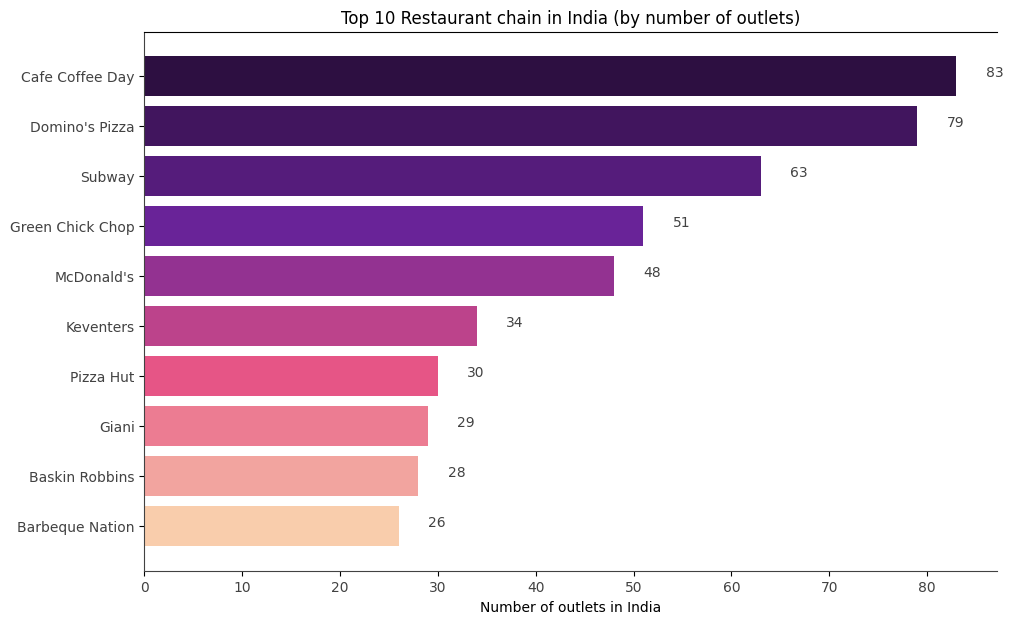

In [32]:
height = top10_chains.values
bars = top10_chains.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ["#f9cdac","#f2a49f","#ec7c92","#e65586","#bc438b","#933291","#692398","#551c7b","#41155e","#2d0f41"]
plt.barh(y_pos, height, color=colors)
 
plt.xticks(color="#424242")

plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets in India")

for i, v in enumerate(height):
    ax.text(v+3, i, str(v), color='#424242')
plt.title("Top 10 Restaurant chain in India (by number of outlets)")


plt.show()

In [33]:
outlets=data["Restaurant Name"].value_counts()

In [34]:
atleast_5_outlets=outlets[outlets>4]

In [35]:
# Assuming you have a DataFrame named 'data' with columns 'Restaurant Name' and 'Aggregate rating'

# Calculate the number of outlets for each restaurant chain
outlets_count = data['Restaurant Name'].value_counts()

# Filter out restaurant chains with at least 5 outlets
atleast_5_outlets = outlets_count[outlets_count >= 5]

# Filter data for restaurant chains with at least 5 outlets
filtered_data = data[data['Restaurant Name'].isin(atleast_5_outlets.index)]

# Group by restaurant name and calculate the mean aggregate rating
mean_ratings = filtered_data.groupby('Restaurant Name')['Aggregate rating'].mean()

# Get the top 10 restaurant chains based on mean aggregate rating
top10_chains = mean_ratings.nlargest(10)

# Print the result
print(top10_chains)


Restaurant Name
Chili's            4.580000
Farzi Cafe         4.366667
Barbeque Nation    4.353846
Punjab Grill       4.340000
Mocha              4.185714
Happy Hakka        3.860000
Texas Roadhouse    3.860000
TGI Friday's       3.850000
L'Opera            3.820000
Starbucks          3.805556
Name: Aggregate rating, dtype: float64


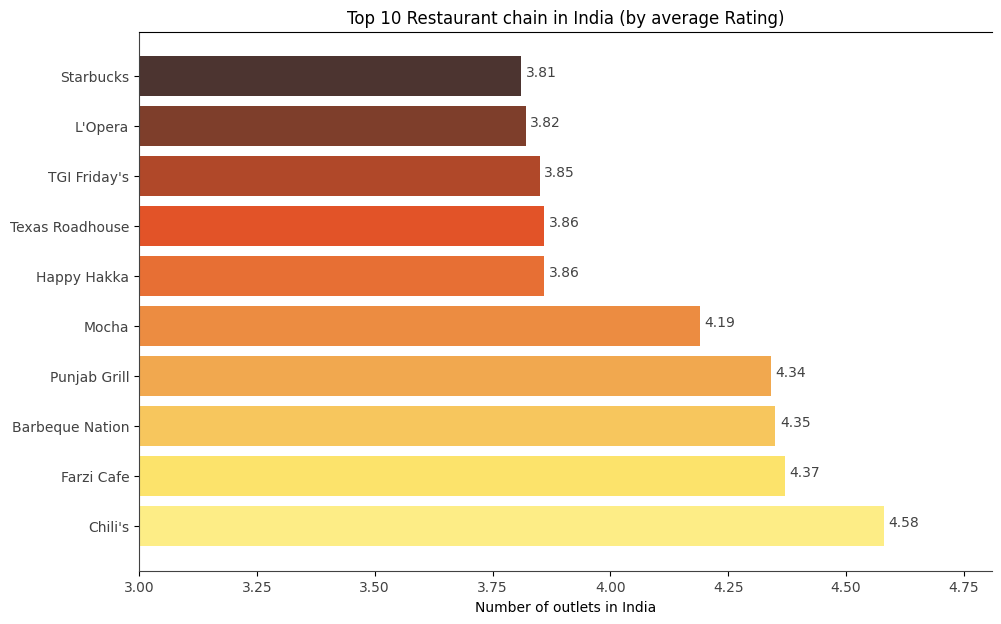

In [36]:
height = pd.Series(top10_chains.values).map(lambda x : np.round(x, 2))
bars = top10_chains.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#fded86', '#fce36b', '#f7c65d', '#f1a84f', '#ec8c41', '#e76f34', '#e25328', '#b04829', '#7e3e2b', '#4c3430']
plt.barh(y_pos, height, color=colors)
plt.xlim(3)
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets in India")

for i, v in enumerate(height):
    ax.text(v + 0.01, i, str(v), color='#424242')
plt.title("Top 10 Restaurant chain in India (by average Rating)")


plt.show()

### Establishment Types¶#### 
Number of restaurants (by establishment type)¶

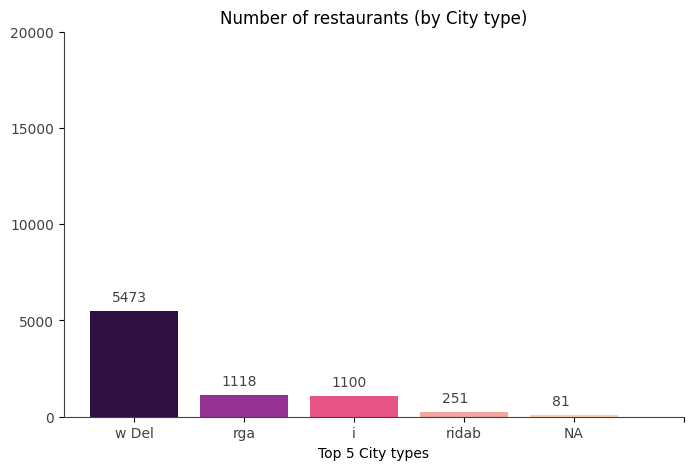

In [37]:
est_count = data.groupby("City").count()["ï»¿Restaurant ID"].sort_values(ascending=False)[:5]

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ["#2d0f41",'#933291',"#e65586","#f2a49f","#f9cdac"]
plt.bar(est_count.index, est_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 25000, 5000), color="#424242")
plt.xlabel("Top 5 City types")

for i, v in enumerate(est_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by City type)")


plt.show()

In [38]:
# Group data by city and calculate the mean aggregate rating
rating_by_est = data.groupby("City")["Aggregate rating"].mean()

# Sort the mean ratings in descending order and select the top 10 cities
top10_cities = rating_by_est.sort_values(ascending=False).head(10)

# Print the result
print(top10_cities)


City
ner Ci          4.900000
ezon Ci         4.800000
kati Ci         4.650000
sig Ci          4.633333
ndaluyong Ci    4.625000
echwor          4.600000
nd              4.535000
guig Ci         4.525000
gaytay Ci       4.500000
cunderab        4.500000
Name: Aggregate rating, dtype: float64


In [39]:
# To check the number of outlets in each of the above establishment type, uncomment to following code

#est_count = data.groupby("establishment").count()["name"].sort_values(ascending=False)
#rating_by_est_map = est_count.index.isin(rating_by_est.index)
#est_count = est_count[rating_by_est_map][rating_by_est.index]
#est_count

In [40]:
# Convert the "Votes" column to numeric (if it's not already)
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')

# Group data by city and calculate the mean number of votes
votes_by_city = data.groupby("City")["Votes"].mean()

# Sort the mean votes in descending order and select the top 10 cities
top10_cities_votes = votes_by_city.sort_values(ascending=False).head(10)

# Print the result
print(top10_cities_votes)


City
lka         2229.650000
ngalo       1512.050000
mb          1484.850000
enn         1384.750000
mpa B       1370.350000
derab       1340.833333
lan         1199.450000
ngera       1183.500000
g            971.000000
cunderab     951.000000
Name: Votes, dtype: float64


In [41]:
# Group data by city and rating text, then count occurrences of each rating text category
rating_text_counts = data.groupby(["City", "Rating text"]).size()

# Reset the index to make it easier to work with
rating_text_counts = rating_text_counts.reset_index(name='Count')

# Find the maximum rating text count for each city
max_rating_text_counts = rating_text_counts.groupby('City')['Count'].max()

# Merge with the original rating text counts to get the corresponding rating text with maximum count
top10_cities_ratings = max_rating_text_counts.reset_index().merge(rating_text_counts, on=['City', 'Count'], how='left')

# Sort the result by the rating text counts in descending order and select the top 10 cities
top10_cities_ratings = top10_cities_ratings.sort_values(by='Count', ascending=False).head(10)

# Print the result
print(top10_cities_ratings)


      City  Count Rating text
134  w Del   2495     Average
110    rga    504     Average
46       i    449     Average
111  ridab    123     Average
1       NA     39   Very Good
12       c     22   Very Good
88   ngalo     20        Good
127   terl     19        Good
8    aziab     18     Average
13   catel     18        Good


### Cuisine¶
#### Unique cuisines

In [42]:
print("Total number of unique Cuisines = ", Cuisines.nunique())

Total number of unique Cuisines =  146


### Number of restaurants (by cuisine)

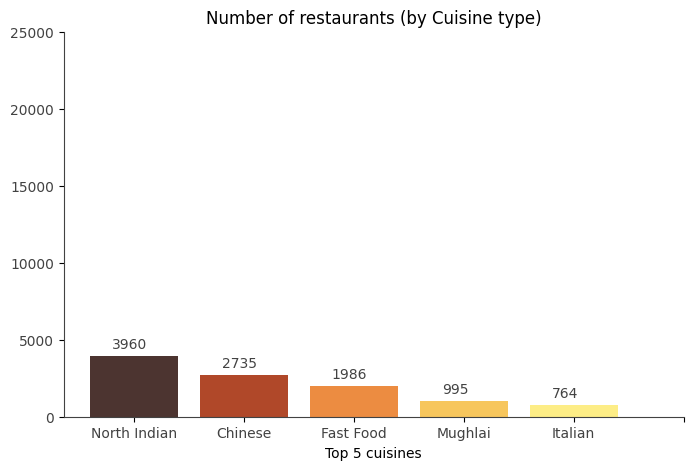

In [43]:
c_count = Cuisines.value_counts()[:5]

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#4c3430', '#b04829', '#ec8c41', '#f7c65d','#fded86']
plt.bar(c_count.index, c_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 30000, 5000), color="#424242")
plt.xlabel("Top 5 cuisines")
for i, v in enumerate(c_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by Cuisine type)")


plt.show()

### Highest rated cuisines

In [44]:
data["Cuisines2"] = data['Cuisines'].apply(lambda x : x.split(", "))

Cuisines_list = Cuisines.unique().tolist()
zeros = np.zeros(shape=(len(Cuisines_list),2))
c_and_r = pd.DataFrame(zeros, index=Cuisines_list, columns=["Sum","Total"])

In [45]:
for i, x in data.iterrows():
    for j in x["Cuisines2"]:
        c_and_r.loc[j]["Sum"] += x["Aggregate rating"]  
        c_and_r.loc[j]["Total"] += 1

In [46]:
c_and_r["Mean"] = c_and_r["Sum"] / c_and_r["Total"]
c_and_r

,Sum,Total,Mean
French,112.0,29.0,3.862069
Japanese,512.6,135.0,3.797037
Desserts,1945.2,653.0,2.978867
Seafood,672.0,174.0,3.862069
Asian,888.9,233.0,3.815021
...,...,...,...
Izgara,8.7,2.0,4.350000
World Cuisine,17.2,4.0,4.300000
Dï¿½_ner,4.4,1.0,4.400000
Restaurant Cafe,16.1,4.0,4.025000


In [47]:
c_and_r[["Mean","Total"]].sort_values(by="Mean", ascending=False)[:10]

,Mean,Total
Sunda,4.900000,3.0
Bï¿½_rek,4.700000,1.0
Taiwanese,4.650000,2.0
Ramen,4.500000,2.0
Dim Sum,4.466667,3.0
Hawaiian,4.412500,8.0
Dï¿½_ner,4.400000,1.0
Bubble Tea,4.400000,1.0
Curry,4.400000,6.0
Kebab,4.380000,10.0


### Highlights/Features of restaurants¶
#### Unique highlights

In [48]:
h1=[]
data["Has Online delivery"].apply(lambda x : h1.extend(x[2:-2].split("', '")))
h1=pd.Series(h1)
print("Total number of unique Has Online delivery=",h1.nunique())

Total number of unique Has Online delivery= 1


In [49]:
print("Total number of unique Cuisines = ", h1.nunique())

Total number of unique Cuisines =  1


### Number of restaurants (by Has Online delivery)¶

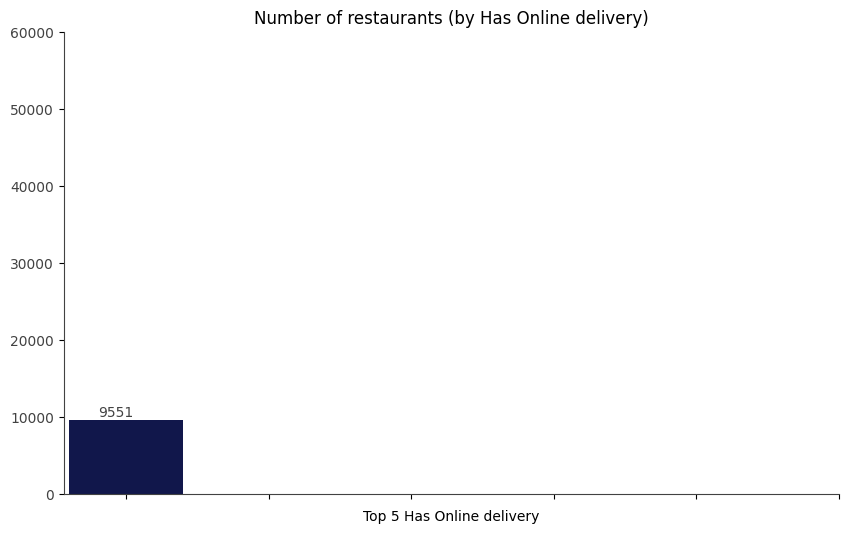

In [50]:
h_count = h1.value_counts()[:5]

fig = plt.figure(figsize=[10,6], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#11174b', '#2a5599', '#3e94c0', '#78c6d0', '#dcecc9']
plt.bar(h_count.index, h_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 70000, 10000), color="#424242")
plt.xlabel("Top 5 Has Online delivery")
for i, v in enumerate(h_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by Has Online delivery)")


plt.show()

### Highest rated Has Online delivery

In [51]:
data["Has Online delivery"][0]

'No'

In [52]:
data["Has Online delivery2"] = data['Has Online delivery'].apply(lambda x : x[2:-2].split("', '"))

h1_list = h1.unique().tolist()
zeros = np.zeros(shape=(len(h1_list),2))
h_and_r = pd.DataFrame(zeros, index=h1_list, columns=["Sum","Total"])

In [53]:
for i, x in data.iterrows():
    for j in x["Has Online delivery2"]:
        h_and_r.loc[j]["Sum"] += x["Aggregate rating"]  
        h_and_r.loc[j]["Total"] += 1

In [54]:
h_and_r["Mean"] = h_and_r["Sum"] / h_and_r["Total"]
h_and_r

,Sum,Total,Mean
,25466.5,9551.0,2.66637


In [55]:
h_and_r[["Mean","Total"]].sort_values(by="Mean", ascending=False)[:10]

,Mean,Total
,2.66637,9551.0


### Highlights wordcloud¶
##### Here we will create a wordcloud of top 30 highlights

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'h1' is a list containing text data

try:
    # Check if 'h1' is a non-empty list containing only strings
    if isinstance(h1, list) and all(isinstance(item, str) for item in h1):
        if h1:
            # Join the elements of 'h1' into a single string
            h1_str = " ".join(h1)

            # Generate the word cloud
            wordcloud = WordCloud(width=800, height=500, 
                                  background_color='white', 
                                  min_font_size=10, max_words=30).generate(h1_str) 

            # Plot the word cloud
            plt.figure(figsize=(8, 8), facecolor=None) 
            plt.imshow(wordcloud, interpolation='bilinear') 
            plt.axis("off") 
            plt.tight_layout(pad=0) 
            plt.show()
        else:
            print("The list 'h1' is empty. No word cloud generated.")
    else:
        raise TypeError("'h1' should be a non-empty list containing only strings.")
except Exception as e:
    print("An error occurred:", str(e))



An error occurred: 'h1' should be a non-empty list containing only strings.


### Ratings and cost¶#### 
Ratings distribution
Let's see how the ratings are distributes

C:\Users\HP\AppData\Local\Temp\ipykernel_18636\3296779145.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Aggregate rating'], shade=True)


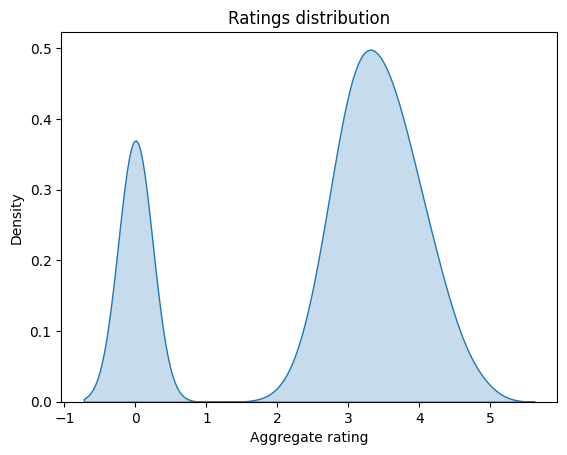

In [57]:
sns.kdeplot(data['Aggregate rating'], shade=True)
plt.title("Ratings distribution")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_18636\3451590229.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Average Cost for two'], shade=True)


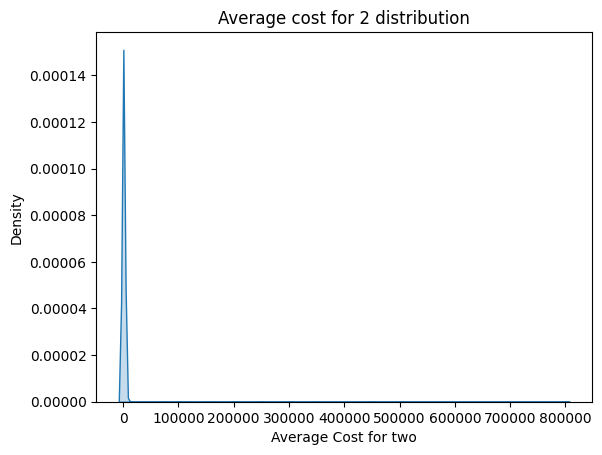

In [58]:
sns.kdeplot(data['Average Cost for two'], shade=True)
plt.title("Average cost for 2 distribution")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_18636\1117229910.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Average Cost for two'], shade=True)


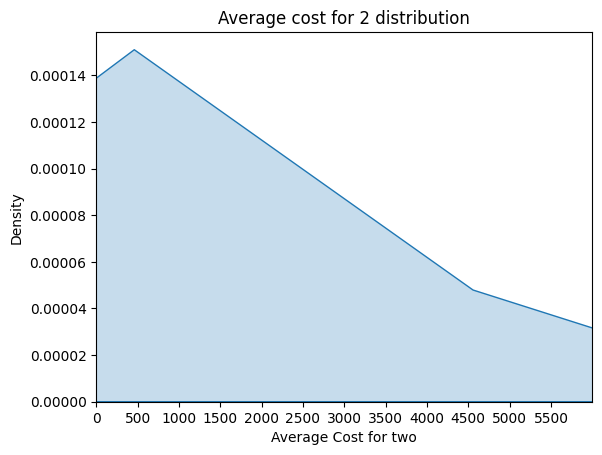

In [59]:
sns.kdeplot(data['Average Cost for two'], shade=True)
plt.xlim([0, 6000])
plt.xticks(range(0,6000,500))
plt.title("Average cost for 2 distribution")
plt.show()

### Price range count

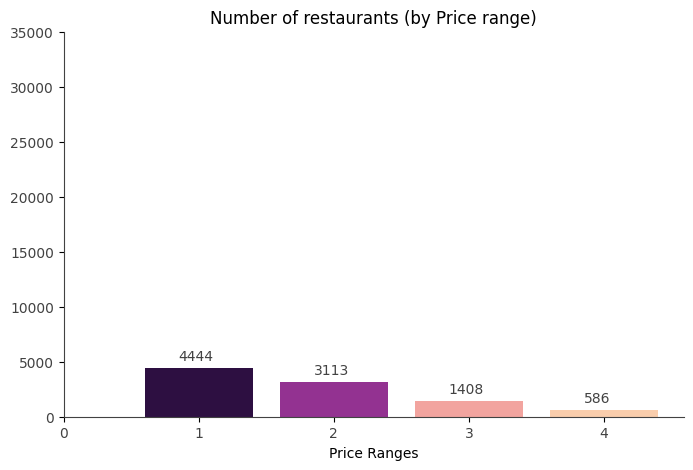

In [60]:
pr_count = data.groupby("Price range").count()["Restaurant Name"]

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ["#2d0f41",'#933291',"#f2a49f","#f9cdac"]
plt.bar(pr_count.index, pr_count.values, color=colors)
plt.xticks(range(0, 5), color="#424242")
plt.yticks(range(0, 40000, 5000), color="#424242")
plt.xlabel("Price Ranges")

for i, v in enumerate(pr_count):
    ax.text(i+0.85, v+700, str(v), color='#424242')
plt.title("Number of restaurants (by Price range)")


plt.show()


### Relation between Average price for two and Rating

In [61]:
np.round(data[["Average Cost for two","Aggregate rating"]].corr()["Average Cost for two"][1],2)

C:\Users\HP\AppData\Local\Temp\ipykernel_18636\846061633.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.round(data[["Average Cost for two","Aggregate rating"]].corr()["Average Cost for two"][1],2)


0.05

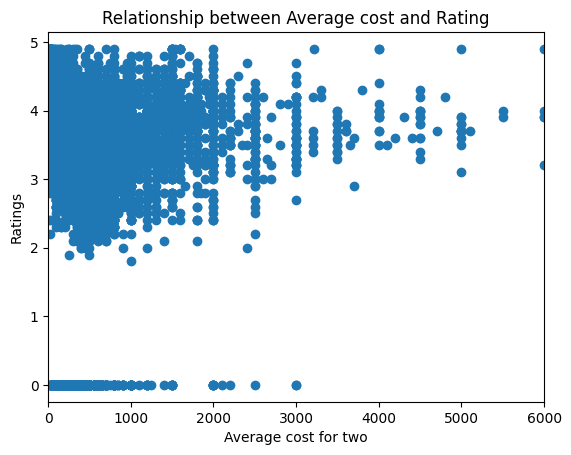

In [62]:
plt.plot("Average Cost for two","Aggregate rating", data=data, linestyle="none", marker="o")
plt.xlim([0,6000])
plt.title("Relationship between Average cost and Rating")
plt.xlabel("Average cost for two")
plt.ylabel("Ratings")
plt.show()

### Relation between Price range and Rating

In [63]:
np.round(data[["Price range","Aggregate rating"]].corr()["Price range"][1],2)

C:\Users\HP\AppData\Local\Temp\ipykernel_18636\3080229502.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.round(data[["Price range","Aggregate rating"]].corr()["Price range"][1],2)


0.44

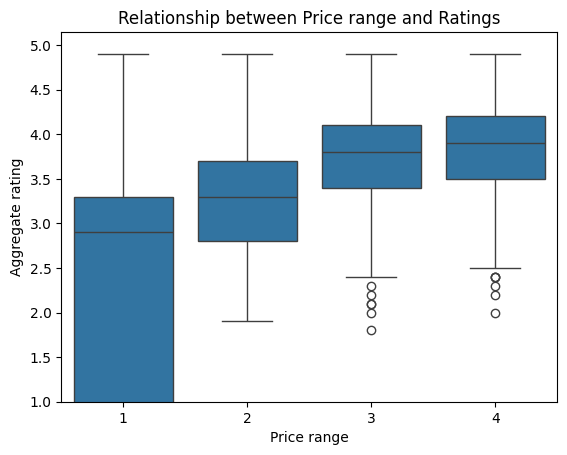

In [64]:
sns.boxplot(x='Price range', y='Aggregate rating', data=data)
plt.ylim(1)
plt.title("Relationship between Price range and Ratings")
plt.show()